In [1]:
# set up basic packages
import numpy as np
import pandas as pd
import astropy.units as u

# set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# set up astropy
from astropy.io import fits
from astropy.wcs import WCS
from astropy.wcs.utils import pixel_to_skycoord
from astropy.utils.data import get_pkg_data_filename
from astropy.coordinates import SkyCoord, Angle

In [2]:
# this is the name of the image file
image_file = '/Users/ngbinh/Downloads/out/results.fits'

In [3]:
# this opens the HDU list of the .fits files and asks for the information within. SCI is what we'll use
hdu_list = fits.open(image_file)
hdu_list.info()

# this saves the WCS setting to be used later
wcs = WCS(hdu_list[1].header)

Filename: /Users/ngbinh/Downloads/out/results.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    350   100R x 115C   [K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   


In [4]:
image_data = hdu_list[1].data

In [5]:
headers = hdu_list[1].header
# print(headers)

In [6]:
hdu_list.close()

In [7]:
sample_size = np.size(image_data)

In [22]:
# this creates separate empty arrays to store the values for average SFR over 100 Myrs 
# (in solar mass per year), stellar mass (in solar mass), and redshift, respectively
bayes_redshift = np.zeros(sample_size) # unit: none
bayes_sfr_Myr100yrs = np.zeros(sample_size) # unit: Msun / yr
bayes_stellar_mass = np.zeros(sample_size) # unit: Msun

# this loops through the image data file and retrieves the values we're looking for.
# the indices 5, 9 and 11 are based on the appendix of Boquien et al (2018)
for i in range(sample_size): 
    bayes_redshift[i] = image_data[i][5]
    bayes_sfr_Myr100yrs[i] = image_data[i][9]
    bayes_stellar_mass[i] = image_data[i][11]

# what does sfr_Myr100yrs mean? 100 Myrs is the lookback time, due to IR sensitivities.

/var/folders/td/xh27mb7x6jz3g1splvmtw7z80000gn/T/ipykernel_3877/2519636023.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


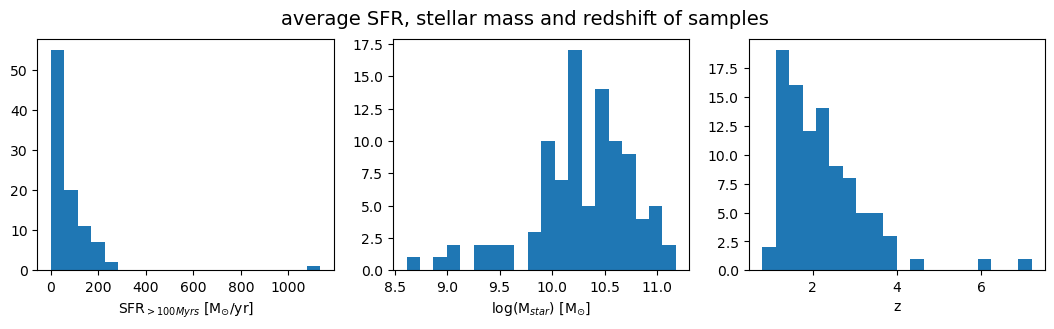

In [20]:
# now make histograms summarizing the results

fig, axs = plt.subplots(1, 3, figsize=(13, 3))
fig.suptitle('average SFR, stellar mass and redshift of samples', size=14)

axs[0].hist(bayes_sfr_Myr100yrs, bins=20)
axs[0].set(xlabel=r'SFR$_{>100Myrs}$ [M$_{\odot}$/yr]')
axs[1].hist(np.log10(bayes_stellar_mass), bins=20) 
axs[1].set(xlabel=r'log(M$_{star})$ [M$_{\odot}$]')
#axs[1].set_xscale('log')
axs[2].hist(bayes_redshift, bins=20) 
axs[2].set(xlabel='z')

fig.show()